<a href="https://colab.research.google.com/github/RobertSM211099/Recommendation-system/blob/main/Sistema_Recomendacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express  as px
import matplotlib.pyplot as plt
import seaborn as sns
import ast
pd.set_option('display.max_columns', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importar data del drive
cursos = pd.read_csv ('/content/drive/MyDrive/Cursos Udemy Data/udemy_courses_get_start.csv')


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
print (cursos.shape)
cursos.head(1)

(3683, 12)


,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance


In [ ]:
#show duplicates
cursos[cursos.duplicated()]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
789,837322,Essentials of money value: Get a financial Life !,https://www.udemy.com/essentials-of-money-value/,True,20,0,0,20,All Levels,37 mins,2016-05-16T18:28:30Z,Business Finance
790,1157298,Introduction to Forex Trading Business For Beg...,https://www.udemy.com/introduction-to-forex-tr...,True,20,0,0,27,Beginner Level,1.5 hours,2017-04-23T16:19:01Z,Business Finance
897,1035638,Understanding Financial Statements,https://www.udemy.com/understanding-financial-...,True,25,0,0,10,All Levels,1 hour,2016-12-15T14:56:17Z,Business Finance
1104,1084454,CFA Level 2- Quantitative Methods,https://www.udemy.com/cfa-level-2-quantitative...,True,40,0,0,35,All Levels,5.5 hours,2017-07-02T14:29:35Z,Business Finance
1477,185526,MicroStation - Células,https://www.udemy.com/microstation-celulas/,True,20,0,0,9,Beginner Level,37 mins,2014-04-15T21:48:55Z,Graphic Design
2566,28295,Learn Web Designing & HTML5/CSS3 Essentials in...,https://www.udemy.com/build-beautiful-html5-we...,True,75,43285,525,24,All Levels,4 hours,2013-01-03T00:55:31Z,Web Development


In [ ]:
#remove duplicates
cursos.drop_duplicates(inplace=True)

In [ ]:
# Filtrar las filas donde la columna "subject" no sea "Musical Instruments"
cursos = cursos[cursos['subject'] != 'Musical Instruments']

In [ ]:
cursos.head(1)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance


In [ ]:
fig = px.box(cursos,
       x='content_duration',
       y='is_paid',
       orientation='h',
       color='is_paid',
       title='Duration Distribution Across Type of Course',
       color_discrete_sequence=['#03cffc','#eb03fc']
      )


fig.update_layout(showlegend=False)
fig.update_xaxes(title='Content Duration')
fig.update_yaxes(title='Paid Course')
fig.show()

In [ ]:
fig = px.box(cursos,
       x='content_duration',
       y='subject',
       orientation='h',
       color='is_paid',
       title='Duration Distribution Across Subject and Type of Course',
       color_discrete_sequence=['#03cffc','#eb03fc']
      )


fig.update_xaxes(title='Content Duration')
fig.update_yaxes(title='Course Subject')
fig.show()

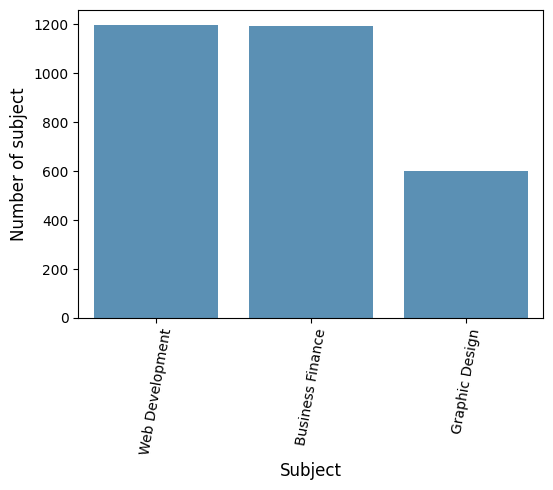

In [ ]:
cnt_pro = cursos['subject'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=cnt_pro.index, y=cnt_pro.values, alpha=0.8)
plt.ylabel('Number of subject', fontsize=12)
plt.xlabel('Subject', fontsize=12)
plt.xticks(rotation=80)
plt.show();

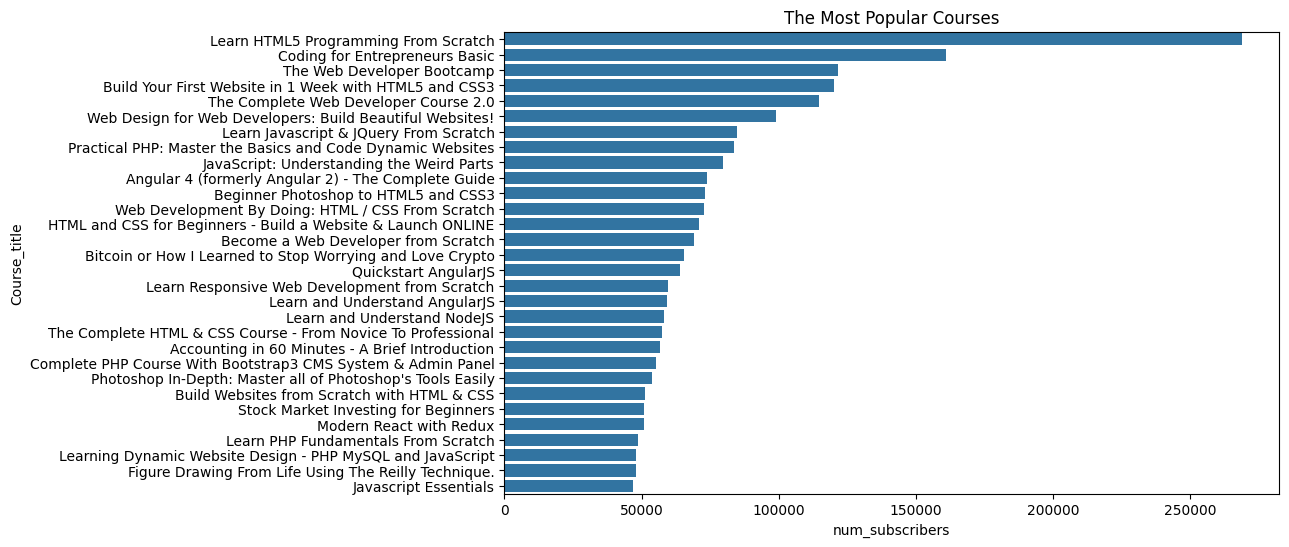

In [ ]:
#Top 30 Most Popular Courses by num_subscribers
top_course = cursos.sort_values(by='num_subscribers', ascending=False)[:30]
figure = plt.figure(figsize=(10,6))
sns.barplot(y=top_course.course_title, x=top_course.num_subscribers)
plt.xticks()
plt.xlabel('num_subscribers')
plt.ylabel('Course_title')
plt.title('The Most Popular Courses')
plt.show()

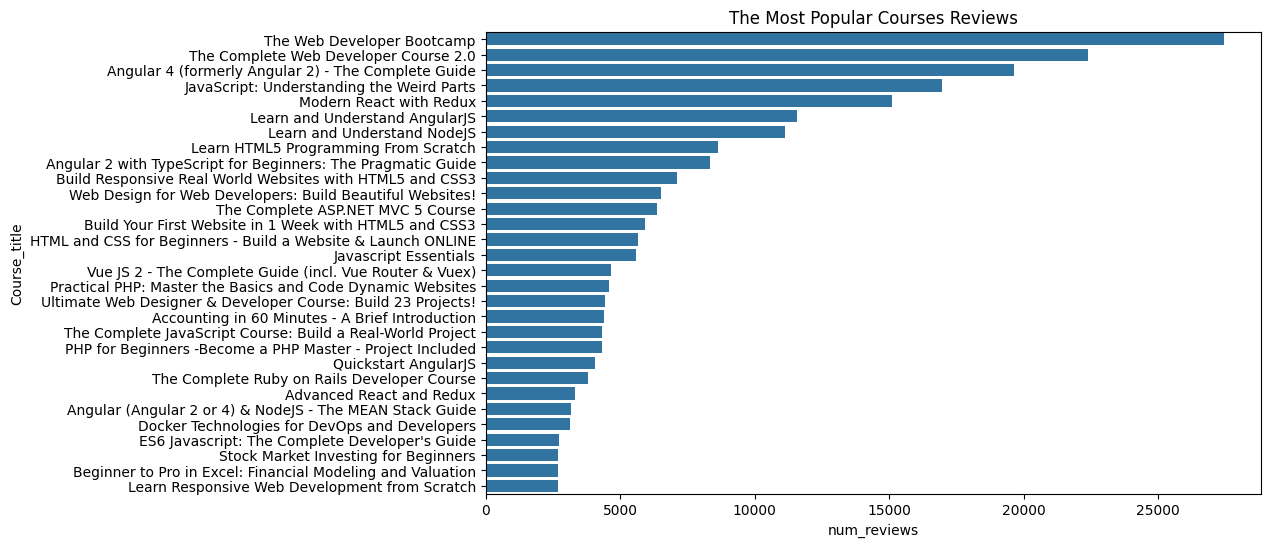

In [ ]:
#Top 30 Most Popular Courses Reviews by num_reviews
top_course = cursos.sort_values(by='num_reviews', ascending=False)[:30]
figure = plt.figure(figsize=(10,6))
sns.barplot(y=top_course.course_title, x=top_course.num_reviews)
plt.xticks()
plt.xlabel('num_reviews')
plt.ylabel('Course_title')
plt.title('The Most Popular Courses Reviews')
plt.show()

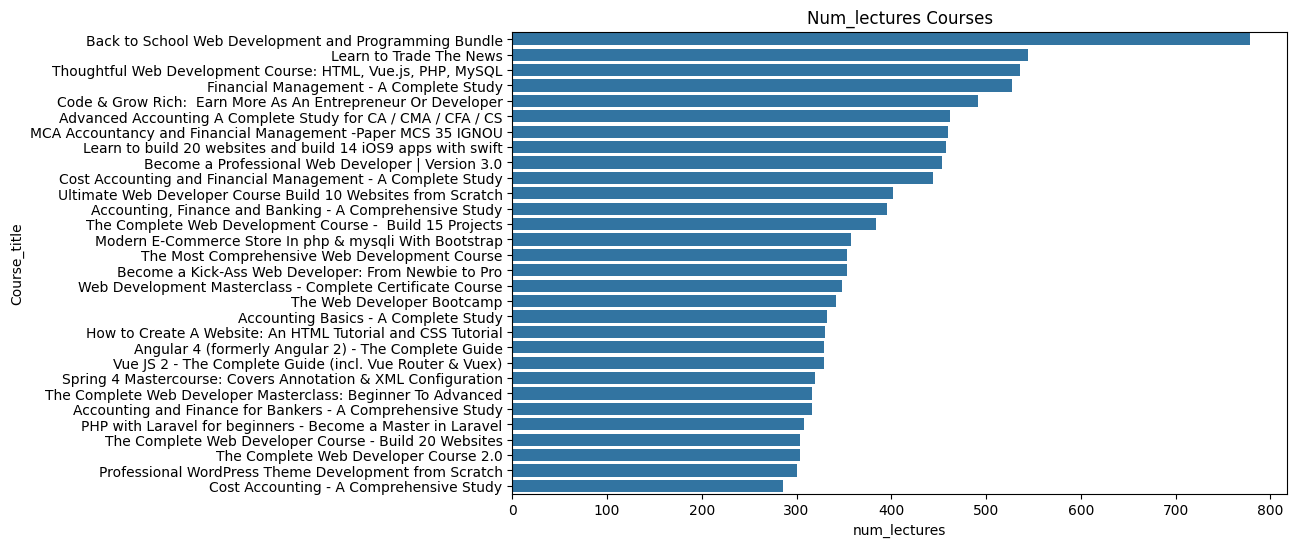

In [ ]:
#Top 30 Num_lectures by num_lectures
top_course = cursos.sort_values(by='num_lectures', ascending=False)[:30]
figure = plt.figure(figsize=(10,6))
sns.barplot(y=top_course.course_title, x=top_course.num_lectures)
plt.xticks()
plt.xlabel('num_lectures')
plt.ylabel('Course_title')
plt.title('Num_lectures Courses')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning:

43.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning:

26.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning:

20.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning:

23.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning:

31.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categor

<Axes: xlabel='subject', ylabel='price'>

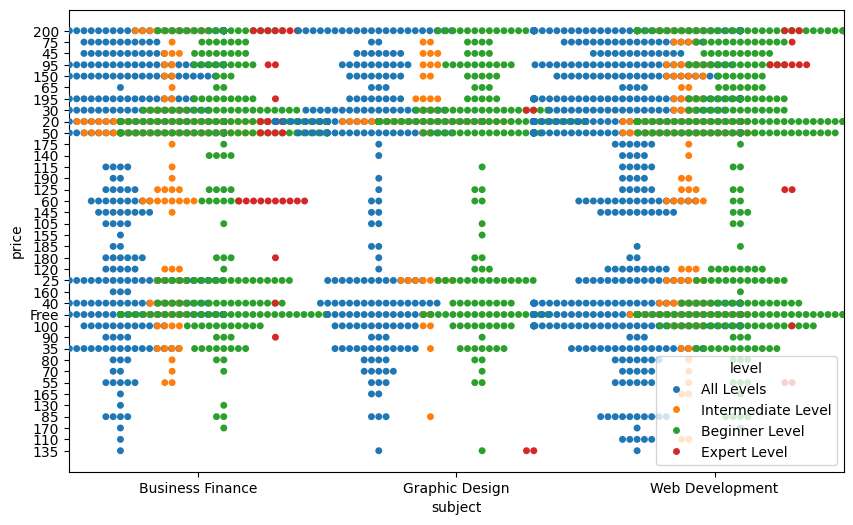

In [ ]:
plt.figure(figsize=(10,6))
sns.swarmplot(x='subject',hue='level',y='price',data=cursos,dodge=True)

In [ ]:
#Filtrar por columnas
cursos = cursos [['course_title','price','num_subscribers','content_duration','published_timestamp','subject']]

In [ ]:
cursos.head(1)

,course_title,price,num_subscribers,content_duration,published_timestamp,subject
0,Ultimate Investment Banking Course,200,2147,1.5 hours,2017-01-18T20:58:58Z,Business Finance


In [ ]:
#tipos de datos
cursos.dtypes

course_title           object
price                  object
num_subscribers         int64
content_duration       object
published_timestamp    object
subject                object
dtype: object

In [ ]:
import ast #Se importa el modulo 'ast' para analizar y evaluar el codigo en forma de arbol sintactico abstracto
def convert(text):
  L = [] #Lista llamada 'L' para almacenar los valores extraidos
  for i in ast.literal_eval(text):
    L.append(i['hours'])
  return L
#text = representacion de lista de diccionarios


In [ ]:
cursos.sample(5)

,course_title,price,num_subscribers,content_duration,published_timestamp,subject
776,FX Commodity Chart Trading Patterns for Success,50,83,2.5 hours,2015-07-19T19:23:14Z,Business Finance
3433,Flask Tutorial Step by Step,Free,4645,2 hours,2017-02-28T16:27:45Z,Web Development
1247,Aprenda Modelagem 3D com o 123D Design,Free,334,1 hour,2016-07-07T21:15:34Z,Graphic Design
3273,WordPress Basics to Business: Share and Sell y...,50,1125,3.5 hours,2016-04-07T21:06:31Z,Web Development
1716,3DS MAX - Learn 3Ds MAX tutorial for Beginners...,20,785,4.5 hours,2017-04-18T16:45:59Z,Graphic Design


In [ ]:
#Crea Dataframe
import re
dfCursos = pd.DataFrame(cursos)

In [ ]:
#funcion trabaja con el dataframe para convertir los datos content_duration a minutos para poder ser tratada en el ML
durations = dfCursos['content_duration'].tolist()

def convertir_a_minutos(duracion):
    # Reemplazar comas por puntos en los números decimales
    duracion = duracion.replace(',', '.')

    # Expresiones regulares para extraer horas y minutos
    horas = re.search(r'(\d+(\.\d+)?)\s*hours?', duracion)
    minutos = re.search(r'(\d+(\.\d+)?)\s*minutes?', duracion)

    total_minutos = 0

    if horas:
        total_minutos += float(horas.group(1)) * 60
    if minutos:
        total_minutos += float(minutos.group(1))

    return total_minutos

# Aplicar la función a cada elemento del array 'durations'
durations_in_minutes = [convertir_a_minutos(d) for d in durations]

# Añadir la nueva columna al DataFrame
dfCursos['content_duration_in_minutes'] = durations_in_minutes

# Mostrar las primeras filas del DataFrame resultante
dfCursos.sample(5)

,course_title,price,num_subscribers,content_duration,published_timestamp,subject,content_duration_in_minutes
2671,Fix Google's New 'Not Secure' Warning with Let...,95,1437,1 hour,2017-03-09T23:25:27Z,Web Development,60.0
362,The Binary Institute - Introductory Course in ...,Free,1121,1 hour,2017-04-27T23:49:48Z,Business Finance,60.0
614,How to read a Profit & Loss Account and Balanc...,20,49,2 hours,2014-09-22T04:05:52Z,Business Finance,120.0
201,The Complete Position Trading Course: Position...,45,1311,1 hour,2016-01-15T18:10:47Z,Business Finance,60.0
760,High-Frequency Trading #2: Market Structure & ...,50,1732,41 mins,2015-11-19T18:22:19Z,Business Finance,0.0


In [ ]:
#el dataframe se sobreescribe a la data anterior
cursos = dfCursos [['course_title','price','num_subscribers','content_duration_in_minutes','published_timestamp','subject']]
cursos.sample(5)


,course_title,price,num_subscribers,content_duration_in_minutes,published_timestamp,subject
939,Financial Accounting For Beginners,60,164,90.0,2016-09-25T18:41:49Z,Business Finance
1093,Inversión: Fundamentos del Trading para Princi...,125,285,90.0,2015-10-26T17:50:47Z,Business Finance
3205,Python and Django Full Stack Web Developer Boo...,200,11832,1890.0,2017-02-24T18:40:55Z,Web Development
1467,After Effects - Alles rund um das Tracking,20,1,90.0,2016-09-13T16:14:44Z,Graphic Design
581,Tax made simple for Limited Company Owners and...,50,11,180.0,2015-02-18T11:50:46Z,Business Finance


In [ ]:
#dataframe para tratar la data de timestamp a solo fecha
df = pd.DataFrame(cursos)

# Extraer la parte de la fecha antes de la letra 'T'
df['published_timestamp'] = df['published_timestamp'].str.split('T').str[0]

# Convertir la columna 'published_timestamp' a tipo datetime
df['published_timestamp'] = pd.to_datetime(df['published_timestamp'], errors='coerce')

cursos = df

# Mostrar las primeras filas del DataFrame resultante
cursos.sample(5)

,course_title,price,num_subscribers,content_duration_in_minutes,published_timestamp,subject
3524,HTML & CSS - Learn to build sleek websites,55,1552,210.0,2014-10-21,Web Development
3209,Angular 4 (formerly Angular 2) - The Complete ...,190,73783,1320.0,2016-02-11,Web Development
3457,Learn PHP Programming for Absolute Beginners,35,5368,120.0,2015-08-05,Web Development
1452,Most Wanted Flat Design Techniques #3: Office ...,95,1028,120.0,2016-03-17,Graphic Design
1759,Adobe Illustrator CC - Print Design for Beginners,50,145,360.0,2016-03-08,Graphic Design


In [ ]:
#se aplica una operacion a la columna 'subject' para dividir en palabras individuales
cursos['subject'] = cursos['subject'].apply(lambda x:x.split())
cursos.sample(5)

,course_title,price,num_subscribers,content_duration_in_minutes,published_timestamp,subject
1663,Mastering Logo Design - 20 Projects step-by-step,200,2599,450.0,2016-09-25,"[Graphic, Design]"
982,"Silver, Gold, and Inflation",Free,5597,60.0,2013-02-16,"[Business, Finance]"
1325,Ilustración de la A a la Z,20,33,180.0,2015-06-08,"[Graphic, Design]"
3529,Ultimate JavaScript Strings,Free,3142,0.0,2016-07-29,"[Web, Development]"
3265,Twitter Bootstrap 2 for Beginners,20,2388,60.0,2013-05-29,"[Web, Development]"


In [ ]:
# Reemplazar 'Free' y otros valores no numéricos con 0
cursos['price'] = pd.to_numeric(cursos['price'].replace({'Free': 0, 'TRUE': 0}), errors='coerce')

# Rellenar los NaN resultantes de la conversión con 0
cursos['price'] = cursos['price'].fillna(0).astype(float)

cursos.sample(5)

,course_title,price,num_subscribers,content_duration_in_minutes,published_timestamp,subject
109,"Binary Options: Trading Strategies, 90% Accura...",195.0,1723,60.0,2015-12-14,"[Business, Finance]"
3627,JavaScript High Performance,95.0,458,270.0,2015-06-12,"[Web, Development]"
242,Advanced Accounting for Investment Banking,50.0,1260,240.0,2014-10-01,"[Business, Finance]"
1653,Getting the Life of an Instructional Designer,40.0,5,90.0,2017-05-01,"[Graphic, Design]"
573,Technical Analysis 101: Ten Primary Candlestic...,95.0,1741,420.0,2014-10-05,"[Business, Finance]"


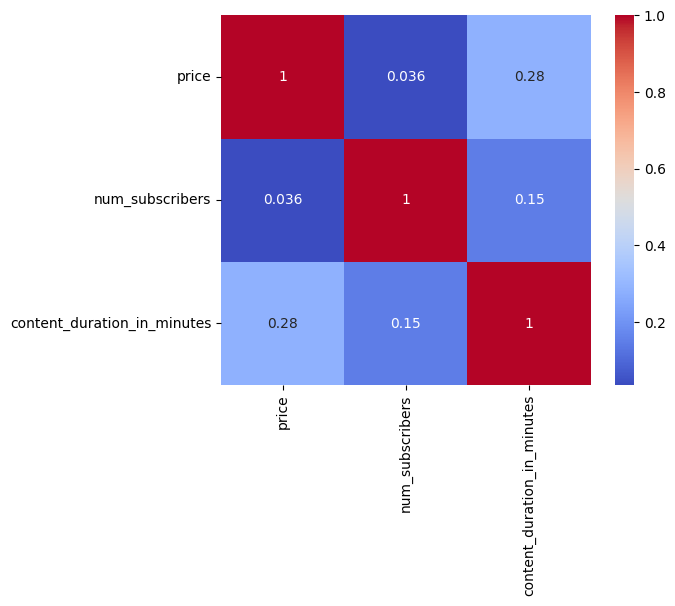

In [ ]:
# Seleccionar solo las columnas numéricas del DataFrame
numeric_columns = ['price', 'num_subscribers', 'content_duration_in_minutes']
Data1 = cursos[numeric_columns]

# Calcular la matriz de correlación
cor = Data1.corr()

# Visualizar la matriz de correlación como un mapa de calor
sns.heatmap(cor, square=True, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
#tratamiento de data de las columnas para convertirlas a string
cursos['price'] = cursos['price'].astype(str)
cursos['num_subscribers'] = cursos['num_subscribers'].astype(str)
cursos['content_duration_in_minutes'] = cursos['content_duration_in_minutes'].astype(str)
cursos['published_timestamp'] = cursos['published_timestamp'].astype(str)
cursos.sample(5)

,course_title,price,num_subscribers,content_duration_in_minutes,published_timestamp,subject
1202,Adobe Illustrator T-Shirt Design for Merch by ...,20.0,390,60.0,2017-06-13,"[Graphic, Design]"
1328,调色高级讲解,200.0,4,60.0,2017-03-31,"[Graphic, Design]"
3045,Learning Drupal 8,50.0,577,570.0,2016-05-11,"[Web, Development]"
3157,Create Your First Wordpress Site in Under an Hour,20.0,4867,60.0,2016-03-30,"[Web, Development]"
690,CFA Corporate Finance Level 1 (Part 1),180.0,621,870.0,2014-12-06,"[Business, Finance]"


In [ ]:
cursos.dtypes


course_title                   object
price                          object
num_subscribers                object
content_duration_in_minutes    object
published_timestamp            object
subject                        object
dtype: object

In [ ]:
#Luego de eso se aplica la funcion lambda la cual pone cada dato como un array
cursos['price'] = cursos['price'].apply(lambda x: [x])
cursos['num_subscribers'] = cursos['num_subscribers'].apply(lambda x: [x])
cursos['content_duration_in_minutes'] = cursos['content_duration_in_minutes'].apply(lambda x: [x])
cursos['published_timestamp'] = cursos['published_timestamp'].apply(lambda x: [x])

#Luego se suman todas la columna como si fueran arrays a una nuev columna llamada tags
cursos['tags'] = cursos['price'] + cursos['num_subscribers'] + cursos['content_duration_in_minutes'] + cursos['published_timestamp'] + cursos['subject']
cursos.sample(5)

,course_title,price,num_subscribers,content_duration_in_minutes,published_timestamp,subject,tags
134,Accounting: Get Hired Without Work Experience,[100.0],[4661],[60.0],[2014-09-01],"[Business, Finance]","[100.0, 4661, 60.0, 2014-09-01, Business, Fina..."
1333,Photoshop: Creando efectos de luz,[20.0],[3],[90.0],[2014-04-02],"[Graphic, Design]","[20.0, 3, 90.0, 2014-04-02, Graphic, Design]"
166,Stock Market investment: Practical Accounting,[125.0],[1120],[180.0],[2017-01-23],"[Business, Finance]","[125.0, 1120, 180.0, 2017-01-23, Business, Fin..."
529,"Day trading strategy for all level, with 72% s...",[95.0],[51],[0.0],[2017-03-02],"[Business, Finance]","[95.0, 51, 0.0, 2017-03-02, Business, Finance]"
865,CFP - Introduction to Financial Planning,[30.0],[1192],[720.0],[2014-02-21],"[Business, Finance]","[30.0, 1192, 720.0, 2014-02-21, Business, Fina..."


In [ ]:
#luego se queda solo con el itutlo y la nueva columna tags en un nuevo dataframe llamado Cursos
Cursos = cursos.drop(columns=['price','num_subscribers','content_duration_in_minutes','published_timestamp','subject'])
Cursos.sample(5)

,course_title,tags
361,TRADING TRUTHS,"[50.0, 1405, 120.0, 2015-06-12, Business, Fina..."
3203,Accelerated ES6 JavaScript Training,"[110.0, 5811, 360.0, 2016-07-12, Web, Developm..."
2994,WordPress Plugin Development -> Deep dive disc...,"[40.0, 2650, 120.0, 2015-11-05, Web, Development]"
899,"Options Foundation - Time Decay, Implied Volat...","[60.0, 459, 180.0, 2013-02-17, Business, Finance]"
1679,Adobe Illustrator Course in Urdu Basics Level ...,"[0.0, 1433, 60.0, 2016-01-19, Graphic, Design]"


In [ ]:
#Ahora se libera el array separandolos con espacio
Cursos['tags'] = Cursos['tags'].apply(lambda x: " ".join(x))
Cursos.sample(5)

,course_title,tags
3397,Python Programming: Create an Digital Marketpl...,195.0 4198 1560.0 2013-10-20 Web Development
438,Forex: Learn to Trade Forex and FX Consistently,50.0 956 330.0 2015-01-20 Business Finance
912,Matemática Financeira com HP12C e MS Excel,20.0 74 270.0 2016-10-12 Business Finance
3433,Flask Tutorial Step by Step,0.0 4645 120.0 2017-02-28 Web Development
1069,Optimize! Make Best Decisions with Microsoft E...,20.0 28 60.0 2015-04-01 Business Finance


Modelo de ML

In [ ]:
#Importala clase CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
#max_features limita el numero max de caracteristicas consideradas en el vectorizador

cv = CountVectorizer(max_features=5000,stop_words='english')
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score

In [ ]:
#realiza el procesos de transformacion y devuelve una matriz dispersa
#cada fila representa un registro en la tabla 'Cursos' y cada columna una palabra unica
vector = cv.fit_transform(Cursos['tags']).toarray()

In [ ]:
vector.shape

(2996, 2076)

In [ ]:
#funcion cosine_simelarity para calcular la similitud del coseno entre filas de la matriz
from sklearn.metrics.pairwise import cosine_similarity
#calcula la siilitud coseno entre cada par de filas (registros)
similarity = cosine_similarity(vector)
#contendra la matriz que representa la similitud coseno
#cada valor matriz indica que tan similares son dos registros en funcion de sus etiquetas convertidas
similarity

array([[1.   , 0.375, 0.25 , ..., 0.   , 0.   , 0.   ],
       [0.375, 1.   , 0.25 , ..., 0.   , 0.   , 0.125],
       [0.25 , 0.25 , 1.   , ..., 0.125, 0.125, 0.125],
       ...,
       [0.   , 0.   , 0.125, ..., 1.   , 0.25 , 0.25 ],
       [0.   , 0.   , 0.125, ..., 0.25 , 1.   , 0.25 ],
       [0.   , 0.125, 0.125, ..., 0.25 , 0.25 , 1.   ]])

In [ ]:
Cursos[Cursos['course_title'] == 'Draw a realistic Fantail using pencil'].index[0]

1287

In [ ]:
#funcion recomendacion
def recommend(course):
  #busca el indice de la pelicula en la tabla 'cursos'
    course_index = Cursos[Cursos['course_title'] == course].index[0]
    #calcula la distancia entre cursos dados y la demmpas usando la matriz similarity
    #se almacenan distncias en lista distances
    distances = sorted(list(enumerate(similarity[course_index])),reverse=True,key = lambda x: x[1])
    #iteramos las primeras 10 cursos más similares
    #
    for i in distances[1:11]:
        print(Cursos.iloc[i[0]].course_title)

In [ ]:
recommend('Graphic Design Secrets Revealed')

Letras en Adobe Illustrator
Discover the 7 Secrets to Figure Drawing: Draw Awesome ...
How to Design Simple Promotional Materials in Photoshop
Mastering Photoshop CC 2017 - The Art of Design & Technology
The Art of Icon Design: Create Custom Flat Icon Designs
Crea personajes fantásticos con Photoshop
Logo Design for Entrepreneurs 
Triangulated Bird: Origami Styled Bird in Adobe Illustrator
Deinen Roman setzen mit PagePlus in 10 einfachen Schritten
Easy Illustration and 2D Animation


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import pickle
#guardamos el dataframe de Cursos con la funcion dump de pickle y similarity tmb en archivos pkl
#esto permite cargarlos sin tener que calcular de nuevo
pickle.dump(Cursos,open('Cursos.pkl','wb'))
pickle.dump(similarity,open('similarity.pkl','wb'))